<a href="https://colab.research.google.com/github/Jeyasri28/Healthcare-Analytics/blob/main/Mini_project_healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings

In [ ]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
class_names_train = test_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


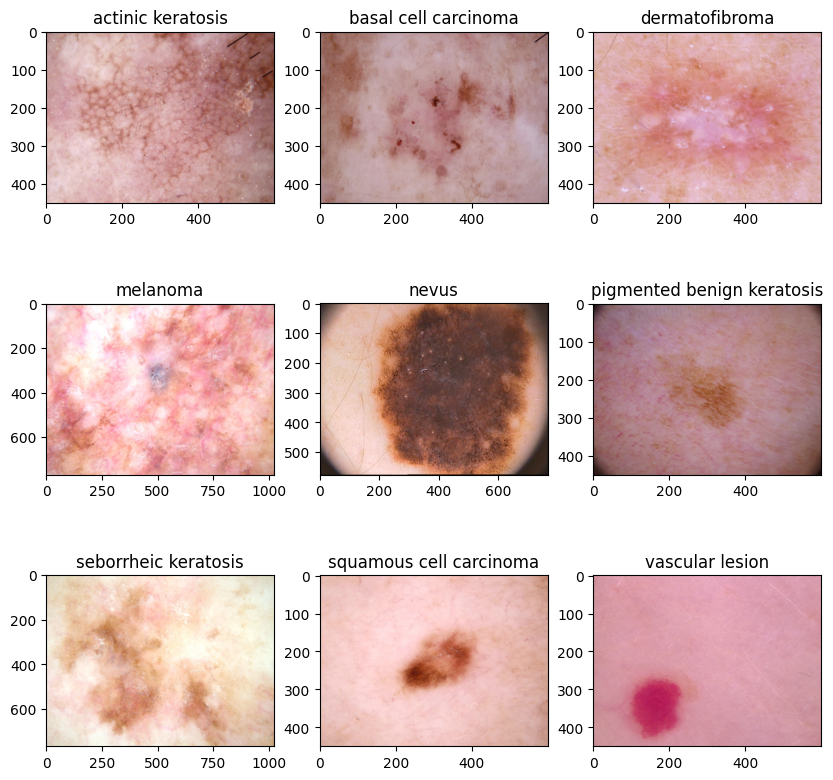

In [ ]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

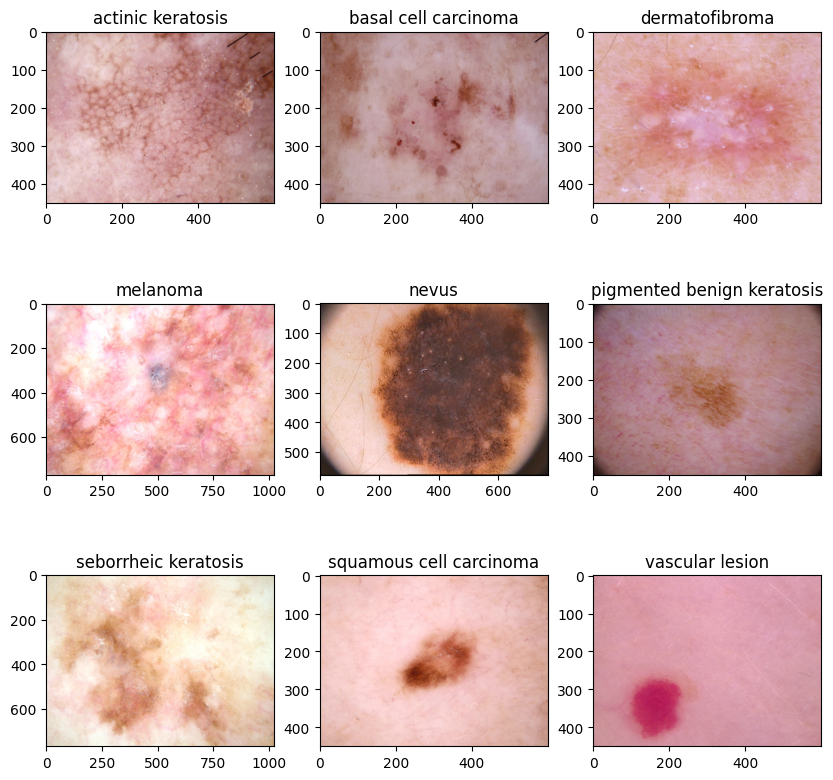

In [ ]:
num_classes = len(class_names_train)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [ ]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [ ]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
56/56 [==============================] - 494s 6s/step - loss: 2.0404 - accuracy: 0.2093 - val_loss: 1.9151 - val_accuracy: 0.2998
Epoch 2/10
56/56 [==============================] - 257s 5s/step - loss: 2.0241 - accuracy: 0.2171 - val_loss: 2.0288 - val_accuracy: 0.2058
Epoch 3/10
56/56 [==============================] - 257s 5s/step - loss: 2.0038 - accuracy: 0.2137 - val_loss: 1.9525 - val_accuracy: 0.3244
Epoch 4/10
56/56 [==============================] - 252s 5s/step - loss: 1.8821 - accuracy: 0.2980 - val_loss: 1.7157 - val_accuracy: 0.3669
Epoch 5/10
56/56 [==============================] - 263s 5s/step - loss: 1.7359 - accuracy: 0.3482 - val_loss: 1.6984 - val_accuracy: 0.3669
Epoch 6/10
56/56 [==============================] - 257s 5s/step - loss: 1.6568 - accuracy: 0.3901 - val_loss: 1.6767 - val_accuracy: 0.3647
Epoch 7/10
56/56 [==============================] - 257s 5s/step - loss: 1.5707 - accuracy: 0.4442 - val_loss: 1.5760 - val_accuracy: 0.4541
Epoch 8/10
56

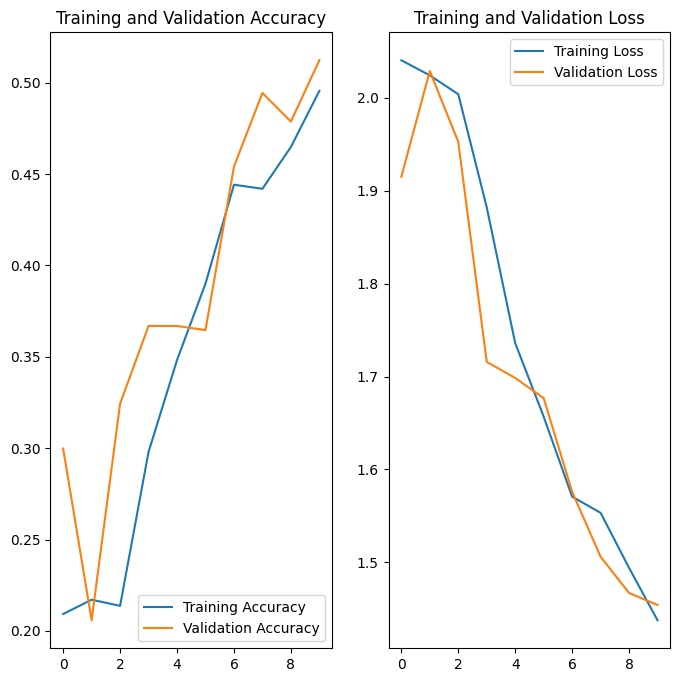

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


y_pred_probs = model.predict(test_ds)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.concatenate([y for _, y in test_ds], axis=0)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)

for class_idx, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision_per_class[class_idx]}")
    print(f"Recall: {recall_per_class[class_idx]}")
    print("-------------------")

4/4 [==============================] - 26s 745ms/step
Accuracy: 0.0660377358490566
Confusion Matrix:
[[0 7 0 1 3 3 0 0 0]
 [0 4 0 1 4 6 0 0 0]
 [0 6 0 0 3 6 0 0 0]
 [0 5 0 0 3 4 0 0 1]
 [0 5 0 2 2 7 0 0 0]
 [0 2 0 3 6 1 0 0 0]
 [0 1 0 0 0 2 0 0 0]
 [0 5 0 2 4 4 0 0 1]
 [0 0 0 0 2 0 0 0 0]]
Class: actinic keratosis
Precision: 0.0
Recall: 0.0
-------------------
Class: basal cell carcinoma
Precision: 0.11428571428571428
Recall: 0.26666666666666666
-------------------
Class: dermatofibroma
Precision: 0.0
Recall: 0.0
-------------------
Class: melanoma
Precision: 0.0
Recall: 0.0
-------------------
Class: nevus
Precision: 0.07407407407407407
Recall: 0.125
-------------------
Class: pigmented benign keratosis
Precision: 0.030303030303030304
Recall: 0.08333333333333333
-------------------
Class: seborrheic keratosis
Precision: 0.0
Recall: 0.0
-------------------
Class: squamous cell carcinoma
Precision: 0.0
Recall: 0.0
-------------------
Class: vascular lesion
Precision: 0.0
Recall: 0.0
---